# Cartpole



The state and control vectors $\textbf{x}$ and $\textbf{u}$ are defined as follows:

$$
\begin{equation*}
\textbf{x} = \begin{bmatrix}
    x & \dot{x} & \theta & \dot{\theta}
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\textbf{u} = \begin{bmatrix}
    F_{x}
    \end{bmatrix}
\end{equation*}
$$

The goal is to swing the carptole upright:
$$
\begin{equation*}
\textbf{x}_{goal} = \begin{bmatrix}
    0 & 0 & \pi & 0
    \end{bmatrix}
\end{equation*}
$$

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pddp
import pddp.examples

In [5]:
import torch
import numpy as np

In [6]:
DT = 0.1  # Time step (s).
RENDER = True  # Whether to render the environment or not.
N = 25 # Horizon length.

# Disable uncertainty since we are dealing with known dynamics.
ENCODING = pddp.StateEncoding.IGNORE_UNCERTAINTY

In [7]:
cost = pddp.examples.cartpole.CartpoleCost()
model = pddp.examples.cartpole.CartpoleDynamicsModel(DT)
env = pddp.examples.cartpole.CartpoleEnv(dt=DT, render=RENDER)

In [8]:
def plot(Z, U):
    t = np.arange(N + 1) * DT
    X = pddp.utils.encoding.decode_mean(Z, ENCODING).detach().numpy()
    U = U.detach().numpy()

    x = X[:, 0]
    x_dot = X[:, 1]
    theta = np.unwrap(X[:, 2])  # Makes for smoother plots.
    theta_dot = X[:, 3]
    
    plt.figure()
    plt.plot(theta, theta_dot)
    plt.xlabel("Orientation (rad)")
    plt.ylabel("Angular velocity (rad/s)")
    plt.title("Orientation Phase Plot")

    plt.figure()
    plt.plot(t, x)
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title("Position path")
    
    plt.figure()
    plt.plot(t, x_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Velocity (m / s)")
    plt.title("Velocity path")
    
    plt.figure()
    plt.plot(t, theta)
    plt.xlabel("Time (s)")
    plt.ylabel("Orientation (rad)")
    plt.title("Orientation path")

    plt.figure()
    plt.plot(t, theta_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Angular velocity (rad / s)")
    plt.title("Angular velocity path")
    
    plt.figure()
    plt.plot(t[:-1], U)
    plt.xlabel("Time (s)")
    plt.ylabel("Force (N)")
    plt.title("Action path")
    
    plt.figure()
    plt.plot(J_hist)
    plt.xlabel("Iteration")
    plt.ylabel("Total loss")
    plt.title("Loss path")

In [9]:
def on_iteration(iteration, Z, U, J_opt, accepted, converged):
    J_opt = J_opt.detach().numpy()

    J_hist.append(J_opt)
    info = "CONVERGED" if converged else ("accepted" if accepted else "FAILED")
    final_state = Z[-1].detach().numpy()
    final_state[2] = (final_state[2] + np.pi) % (2 * np.pi) - np.pi
    print("iteration", iteration + 1, info, J_opt, final_state)

In [10]:
controller = pddp.controllers.PDDPController(env, model, cost)

In [11]:
U = 1e-1*torch.randn(N, model.action_size)

In [12]:
J_hist = []
controller.eval()
Z, U = controller.fit(U, encoding=ENCODING, n_iterations=200, tol=0,
                      on_iteration=on_iteration, u_min=torch.tensor([-2.0]), u_max=torch.tensor([2.0]))


iteration 1 accepted 22.461412 [ 0.12141782 -0.03945908 -3.1279464  -0.648192  ]
iteration 2 accepted 22.44999 [ 0.10508515 -0.0294105   3.1379824  -0.685849  ]
iteration 3 FAILED 22.44999 [ 0.10508515 -0.0294105   3.1379824  -0.685849  ]
iteration 4 FAILED 22.44999 [ 0.10508515 -0.0294105   3.1379824  -0.685849  ]
iteration 5 FAILED 22.44999 [ 0.10508515 -0.0294105   3.1379824  -0.685849  ]
iteration 6 FAILED 22.44999 [ 0.10508515 -0.0294105   3.1379824  -0.685849  ]
iteration 7 FAILED 22.44999 [ 0.10508515 -0.0294105   3.1379824  -0.685849  ]
iteration 8 FAILED 22.44999 [ 0.10508515 -0.0294105   3.1379824  -0.685849  ]
iteration 9 FAILED 22.44999 [ 0.10508515 -0.0294105   3.1379824  -0.685849  ]
iteration 10 FAILED 22.44999 [ 0.10508515 -0.0294105   3.1379824  -0.685849  ]
iteration 11 accepted 22.449986 [ 0.10508496 -0.02940966  3.1379826  -0.68584675]
iteration 12 FAILED 22.449986 [ 0.10508496 -0.02940966  3.1379826  -0.68584675]
iteration 13 FAILED 22.449986 [ 0.10508496 -0.029409

/home/juancamilog/workspace/pddp/pddp/controllers/ilqr.py:241: UserWarning: exceeded max regularization term
  warnings.warn("exceeded max regularization term")


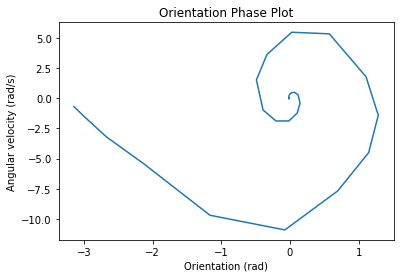

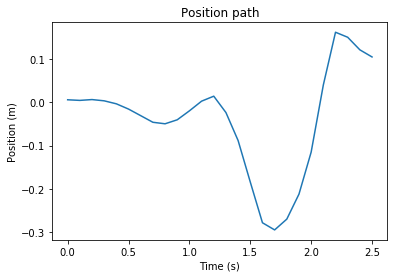

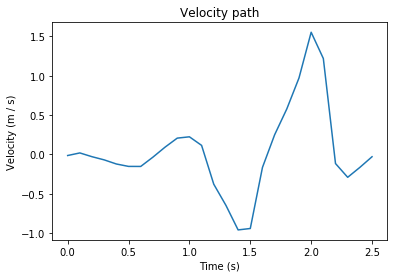

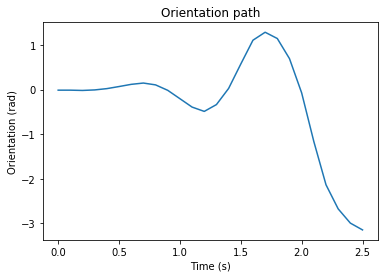

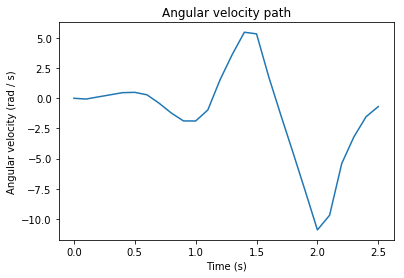

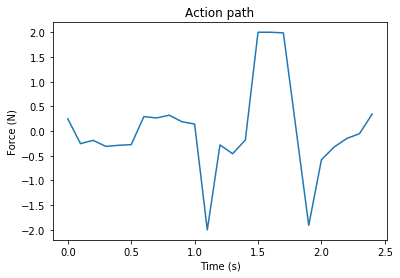

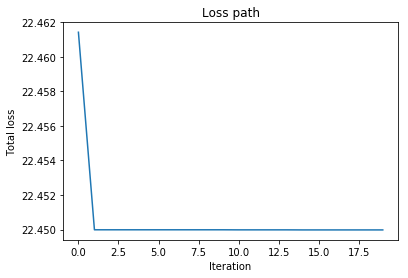

In [13]:
plot(Z, U)

In [14]:
if RENDER:
    # Wait for user interaction before visualizing. 
    _ = input("Press ENTER to continue")

Press ENTER to continue


In [14]:
for u in U:
    print(u)
    env.apply(u)

tensor([0.2485])
tensor([-0.2546])
tensor([-0.1876])
tensor([-0.3101])
tensor([-0.2877])
tensor([-0.2750])
tensor([0.2933])
tensor([0.2655])
tensor([0.3211])
tensor([0.1897])
tensor([0.1417])
tensor([-2.])
tensor([-0.2801])
tensor([-0.4584])
tensor([-0.1813])
tensor([2.])
tensor([2.])
tensor([1.9865])
tensor([0.0383])
tensor([-1.9079])
tensor([-0.5803])
tensor([-0.3231])
tensor([-0.1490])
tensor([-0.0538])
tensor([0.3443])


In [16]:
env.close()